# Paper reproduction : The power of Ensembles for Active Learning in Image Classification

The objective of this project is to replicate the experiments of the baseline __[The power of ensembles for active learning in image classification](https://openaccess.thecvf.com/content_cvpr_2018/html/Beluch_The_Power_of_CVPR_2018_paper.html)__ from William H. Beluch et. al., (CVPR), 2018, pp. 9368-9377.

In particular, the experiments on the MNIST dataset.

This notebook has been used to prove the correctness of the code use: reproducibility of experiments, the correct usage of a seed to have the same conditions for different active learning procedures and show how to apply this on dataloaders. 

# Introduction on Active Learning

The idea of active learning is to efficiently anotate unlabeled instances and add it to the data base.

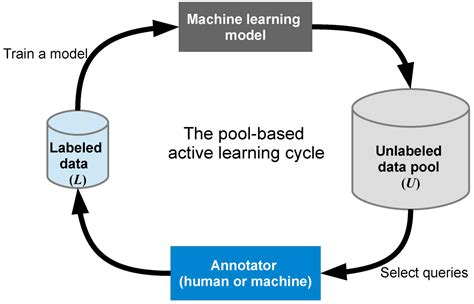

while criterion() :

    model = get_model(L)

    unlabeled_data = select_data(model, U)
    
    data = query_oracle(unlabeled_data)
    
    L = L ∪ data
    
    U = U\unlabeled_data

In [1]:
#Import packages
import torch
import torch.nn as nn
import torch.nn.functional as F

from torchvision import datasets as dts
from torchvision.transforms import ToTensor 

import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


# Load datsets

## MNIST dataset

In [4]:
#Load MNIST dataset
train_mnist = dts.MNIST(
    root = 'data',
    train = True,                         
    transform = ToTensor(), 
    download = False,            
)
test_mnist = dts.MNIST(
    root = 'data', 
    train = False, 
    transform = ToTensor(),
    download = False,         
)

In [5]:
text = f"MNIST Dataset characteristics:\n  - X shape: {list(train_mnist[0][0].shape)}, float ({float(train_mnist[0][0].min())}-{float(train_mnist[0][0].max())})\n"
text += f"  - Y shape: [], int (0-9)\n"
text += f"  - Train size: {len(train_mnist)}\n  - Test size: {len(test_mnist)}\n"
print(text)

MNIST Dataset characteristics:
  - X shape: [1, 28, 28], float (0.0-1.0)
  - Y shape: [], int (0-9)
  - Train size: 60000
  - Test size: 10000



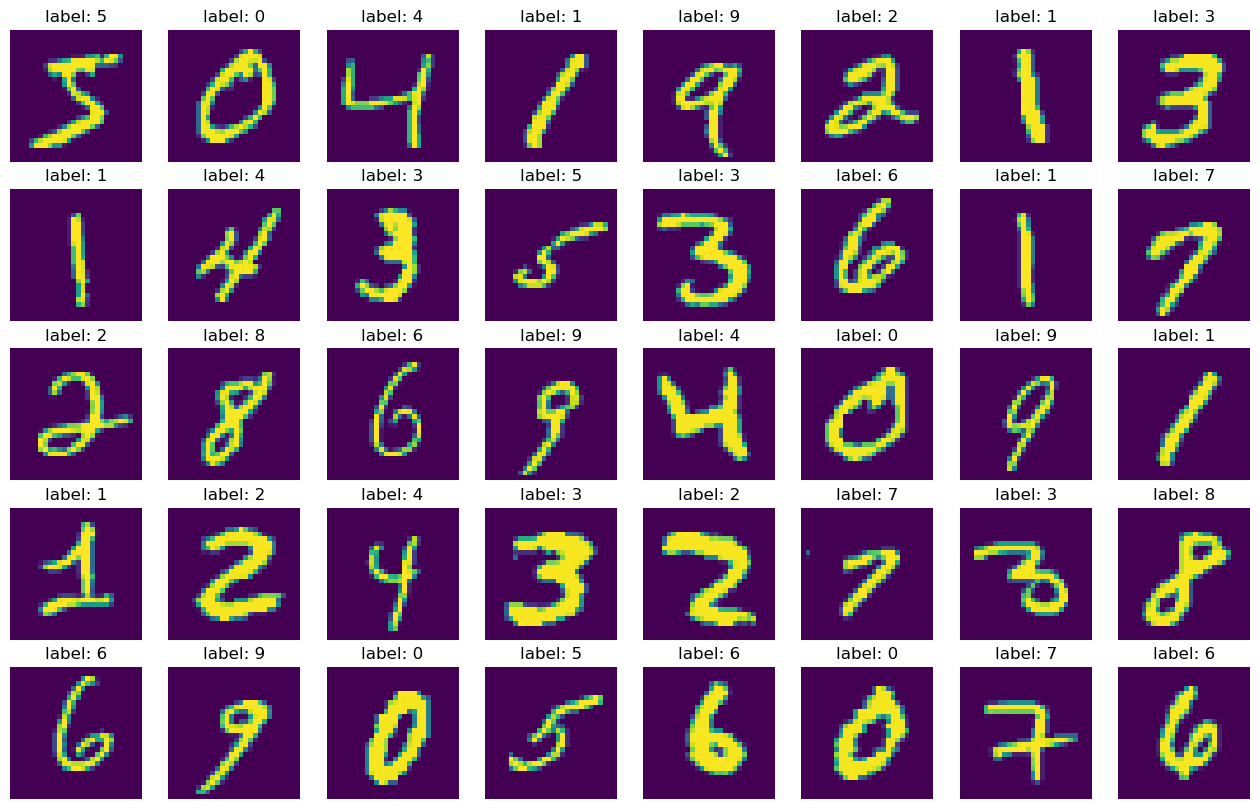

In [6]:
#Plot some images
rows = 8
cols = 5
fig, axs = plt.subplots(cols, rows, figsize=(16,10))
idx = 0
for i in range(cols):
    for j in range(rows):
        img = train_mnist[idx][0].numpy()
        label = train_mnist[idx][1]
        axs[i,j].imshow(img[0])
        axs[i,j].set_title(f'label: {label}')
        axs[i,j].set_axis_off()
        idx += 1

### Making the MNIST dataloader deterministic

Every time the model is trained in a different setting, it should go through the same instances in the same order and be initialize with the same parameters.

In this section, the dataloader will be proven to be deterministic every time is called.

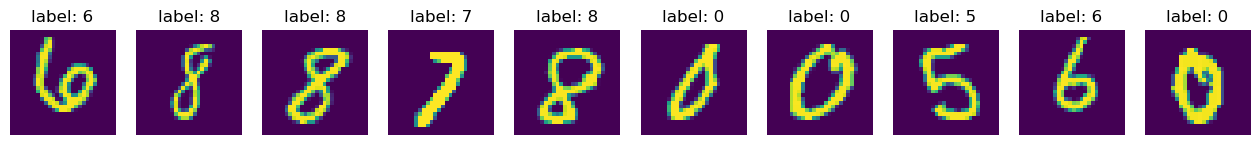

In [7]:
torch.manual_seed(0)
batch_size = 10
fig, axs = plt.subplots(1, batch_size, figsize=(16,10))
trainldr_mnist = torch.utils.data.DataLoader(train_mnist, batch_size=batch_size, shuffle=True)
for x, y in trainldr_mnist:
    for idx in range(batch_size):
        img = x[idx].numpy()
        label = y[idx]
        axs[idx].imshow(img[0])
        axs[idx].set_title(f'label: {label}')
        axs[idx].set_axis_off()
    break

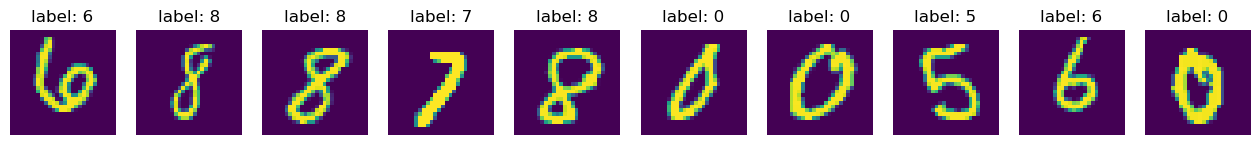

In [8]:
torch.manual_seed(0)
batch_size = 10
fig, axs = plt.subplots(1, batch_size, figsize=(16,10))
trainldr_mnist = torch.utils.data.DataLoader(train_mnist, batch_size=batch_size, shuffle=True)
for x, y in trainldr_mnist:
    for idx in range(batch_size):
        img = x[idx].numpy()
        label = y[idx]
        axs[idx].imshow(img[0])
        axs[idx].set_title(f'label: {label}')
        axs[idx].set_axis_off()
    break

## Cifar10 dataset

Same as the previous section but for a different dataset.

In [9]:
#Load CIFAR10
train_cifar10 = dts.CIFAR10(
    root = 'data',
    train = True,                         
    transform = ToTensor(), 
    download = False,            
)
test_cifar10 = dts.CIFAR10(
    root = 'data', 
    train = False, 
    transform = ToTensor(),
    download = False,         
)

In [10]:
text = f"CIFAR10 Dataset characteristics:\n  - X shape: {list(train_cifar10[0][0].shape)}, float ({float(train_cifar10[0][0].min())}-{float(train_cifar10[0][0].max())})\n"
text += f"  - Y shape: [], int (0-9)\n"
text += f"  - Train size: {len(train_cifar10)}\n  - Test size: {len(test_cifar10)}\n"
print(text)

CIFAR10 Dataset characteristics:
  - X shape: [3, 32, 32], float (0.0-1.0)
  - Y shape: [], int (0-9)
  - Train size: 50000
  - Test size: 10000



In [11]:
labels_cifar10 = '''airplane automobile bird cat deer dog frog horse ship truck'''.split()
print(len(labels_cifar10), labels_cifar10)

10 ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


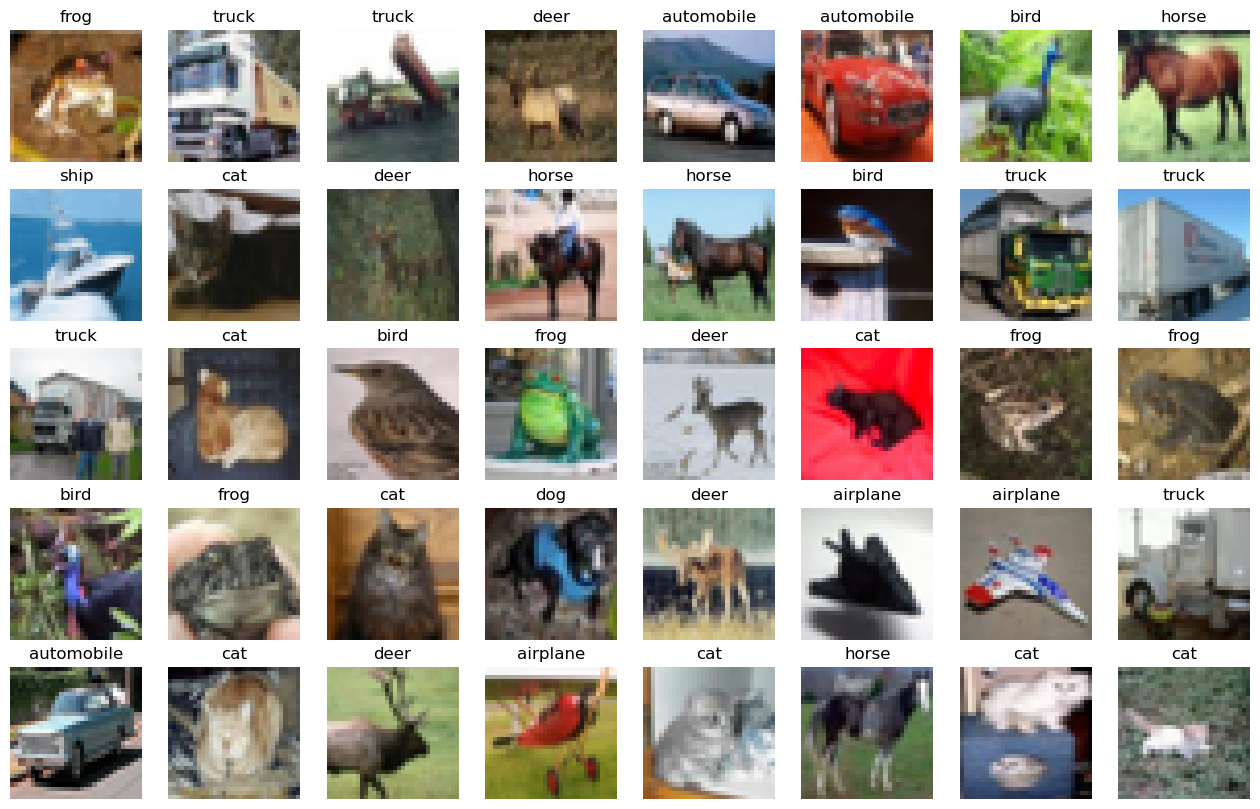

In [12]:
#Plot some images
rows = 8
cols = 5
fig, axs = plt.subplots(cols, rows, figsize=(16,10))
idx = 0
for i in range(cols):
    for j in range(rows):
        img = train_cifar10[idx][0].numpy()
        label = train_cifar10[idx][1]
        img = np.transpose(img, (1,2,0))
        axs[i,j].imshow(img)
        axs[i,j].set_title(f'{labels_cifar10[label]}')
        axs[i,j].set_axis_off()
        idx += 1

### Making the CIFAR10 dataloader deterministic

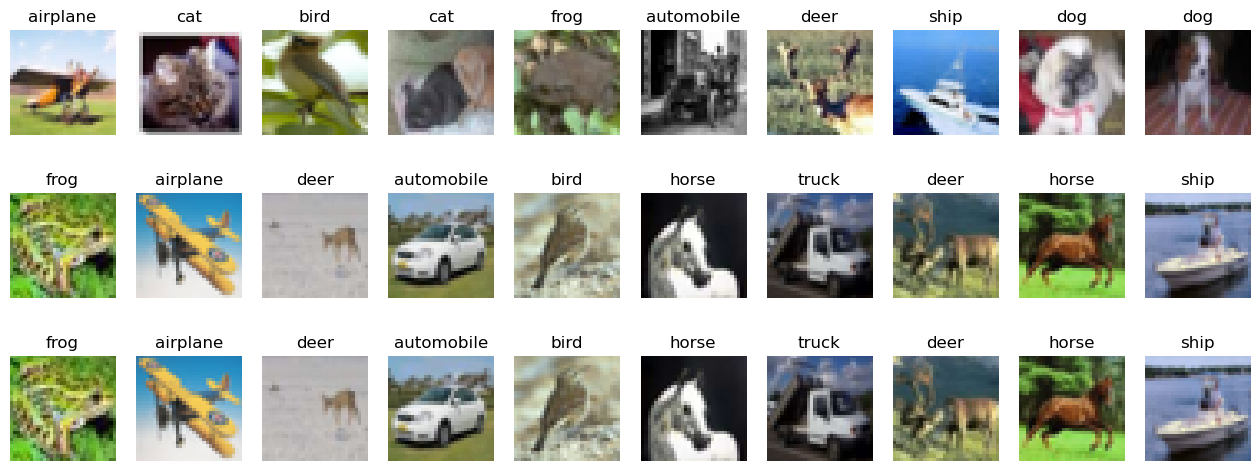

In [13]:
batch_size = 10
fig, axs = plt.subplots(3, batch_size, figsize=(16,6))

torch.manual_seed(41)
trainldr_mnist = torch.utils.data.DataLoader(train_cifar10, batch_size=batch_size, shuffle=True)
for x, y in trainldr_mnist:
    for idx in range(batch_size):
        img = x[idx].numpy()
        label = y[idx]
        img = np.transpose(img, (1,2,0))
        axs[0,idx].imshow(img)
        axs[0,idx].set_title(f'{labels_cifar10[label]}')
        axs[0,idx].set_axis_off()
    break
    
torch.manual_seed(42)
trainldr_mnist = torch.utils.data.DataLoader(train_cifar10, batch_size=batch_size, shuffle=True)
for x, y in trainldr_mnist:
    for idx in range(batch_size):
        img = x[idx].numpy()
        label = y[idx]
        img = np.transpose(img, (1,2,0))
        axs[1,idx].imshow(img)
        axs[1,idx].set_title(f'{labels_cifar10[label]}')
        axs[1,idx].set_axis_off()
    break
    
torch.manual_seed(42)
trainldr_mnist = torch.utils.data.DataLoader(train_cifar10, batch_size=batch_size, shuffle=True)
for x, y in trainldr_mnist:
    for idx in range(batch_size):
        img = x[idx].numpy()
        label = y[idx]
        img = np.transpose(img, (1,2,0))
        axs[2,idx].imshow(img)
        axs[2,idx].set_title(f'{labels_cifar10[label]}')
        axs[2,idx].set_axis_off()
    break

You actually dont need to define different dataloaders. You can create one dataloader an instanciate the seed before sampling to asure the obtention of the same result, as shown below.

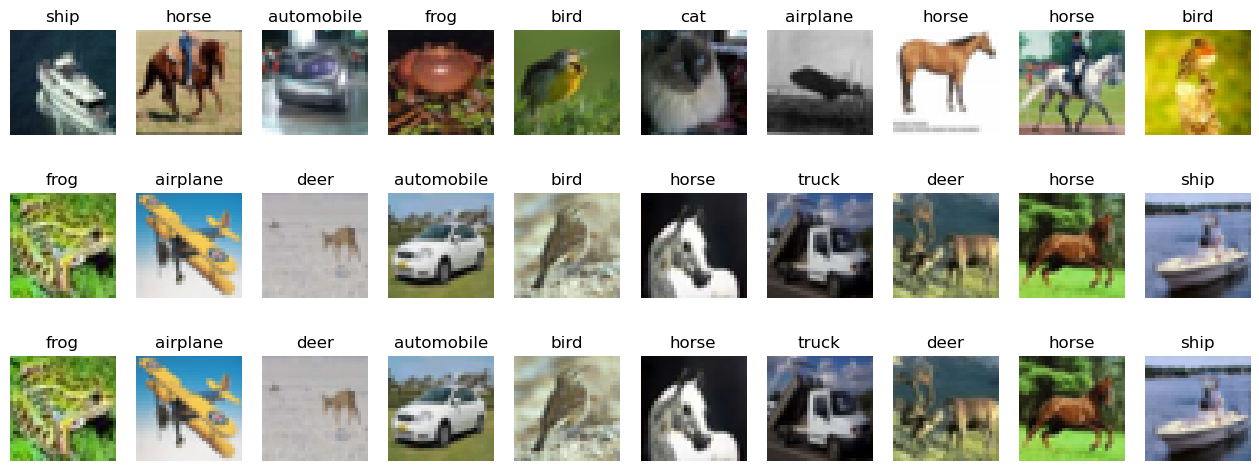

In [14]:
batch_size = 10
fig, axs = plt.subplots(3, batch_size, figsize=(16,6))
trainldr_mnist = torch.utils.data.DataLoader(train_cifar10, batch_size=batch_size, shuffle=True)

torch.manual_seed(41)
for x, y in trainldr_mnist:
    for idx in range(batch_size):
        img = x[idx].numpy()
        label = y[idx]
        img = np.transpose(img, (1,2,0))
        axs[0,idx].imshow(img)
        axs[0,idx].set_title(f'{labels_cifar10[label]}')
        axs[0,idx].set_axis_off()
    break
    
torch.manual_seed(42)
for x, y in trainldr_mnist:
    for idx in range(batch_size):
        img = x[idx].numpy()
        label = y[idx]
        img = np.transpose(img, (1,2,0))
        axs[1,idx].imshow(img)
        axs[1,idx].set_title(f'{labels_cifar10[label]}')
        axs[1,idx].set_axis_off()
    break
    
torch.manual_seed(42)
for x, y in trainldr_mnist:
    for idx in range(batch_size):
        img = x[idx].numpy()
        label = y[idx]
        img = np.transpose(img, (1,2,0))
        axs[2,idx].imshow(img)
        axs[2,idx].set_title(f'{labels_cifar10[label]}')
        axs[2,idx].set_axis_off()
    break